<a href="https://colab.research.google.com/github/KSaxena01/DiabetesPrediction/blob/main/diabetesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement :** Analysis of Different Classification Models for Diabetes Prediction and Finding the Best Model

In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [326]:
diabetes=pd.read_csv('drive/MyDrive/DiabetesPrediction/diabetesProcessed.csv')

In [327]:
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,69,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [328]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Most Common Ages of People Tested

<BarContainer object of 52 artists>

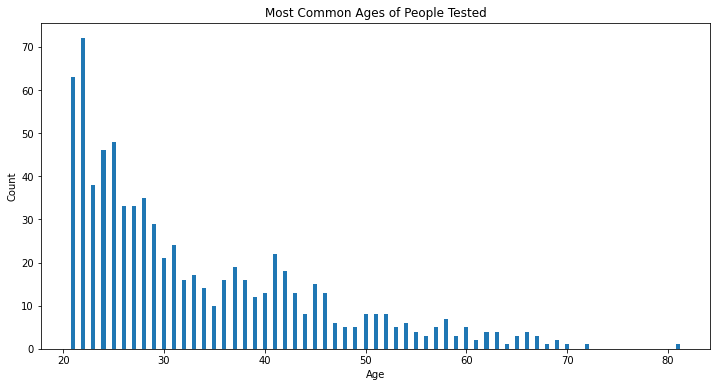

In [329]:
top_age = diabetes.Age.value_counts()
plt.figure(figsize=(12,6))
plt.title('Most Common Ages of People Tested')
plt.xlabel('Age')
plt.ylabel('Count')
plt.bar(top_age.index,top_age, width = 0.4)

## Most Common Blood Pressure of People Tested

(array([  0.,   1.,   3.,  12.,  70., 200., 243., 145.,  44.,  11.,   4.,
          1.,   0.]),
 array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
        140]),
 <a list of 13 Patch objects>)

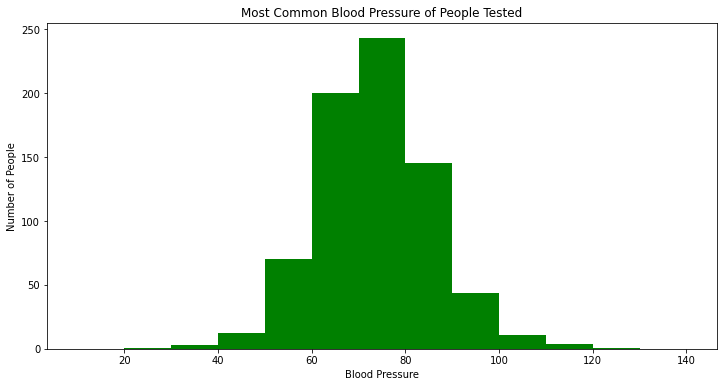

In [330]:
bp = diabetes.BloodPressure
plt.figure(figsize=(12,6))
plt.title('Most Common Blood Pressure of People Tested')
plt.xlabel('Blood Pressure')
plt.ylabel('Number of People')
plt.hist(bp, bins=np.arange(10,150,10), color='green')

## Most Common Glucose of People Tested

(array([  5.,   0.,   0.,   0.,   1.,   3.,   7.,  25.,  63.,  94., 117.,
         93., 103.,  61.,  54.,  41.,  31.,  25.,  28.,  18.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200]),
 <a list of 20 Patch objects>)

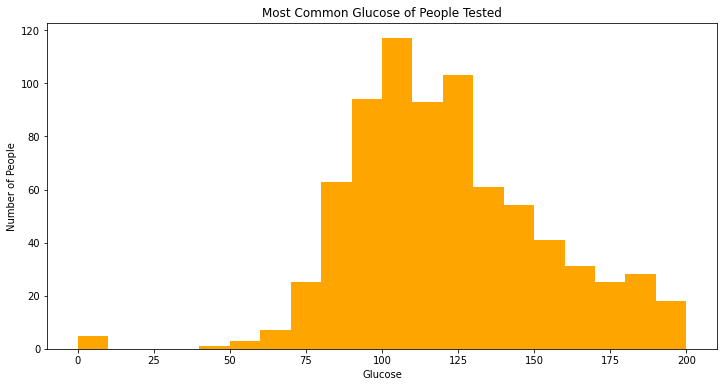

In [331]:
glucose = diabetes.Glucose
plt.figure(figsize=(12,6))
plt.title('Most Common Glucose of People Tested')
plt.xlabel('Glucose')
plt.ylabel('Number of People')
plt.hist(glucose, bins=np.arange(0,210,10), color='orange')

## Most Common BMI of People Tested

(array([ 11.,   0.,   0.,  13.,  93., 179., 224., 151.,  62.,  27.,   5.,
          3.,   0.]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]),
 <a list of 13 Patch objects>)

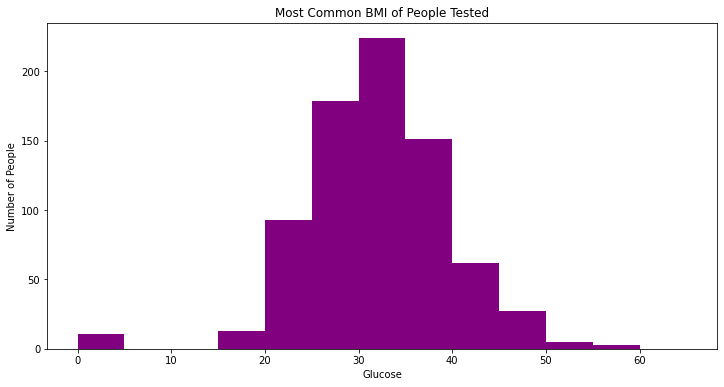

In [332]:
bmi = diabetes.BMI
plt.figure(figsize=(12,6))
plt.title('Most Common BMI of People Tested')
plt.xlabel('Glucose')
plt.ylabel('Number of People')
plt.hist(bmi, bins=np.arange(0,70,5), color='purple')

## Percentage of People Tested Positive For Diabetes

([<matplotlib.patches.Wedge at 0x7fa29b4f7190>,
 [Text(0.49999007131962026, -0.979800963758355, 'negative'),
  Text(-0.49999007131962103, 0.9798009637583547, 'positive')],
 [Text(0.2727218570834292, -0.534436889322739, '65.02%'),
  Text(-0.2727218570834296, 0.5344368893227388, '34.98%')])

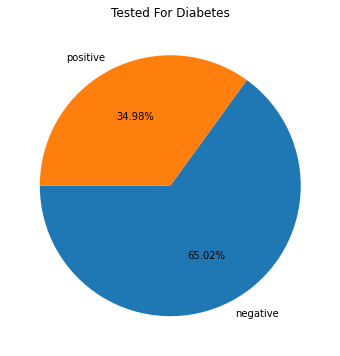

In [333]:
outcome_counts = diabetes.Outcome.value_counts()
plt.figure(figsize=(12,6))
plt.title('Tested For Diabetes')
plt.pie(outcome_counts, labels=['negative', 'positive'], autopct='%1.2f%%', startangle=180)

## Getting 70% Data as Training Data and 30% Data as Testing Data

In [334]:
xtrain = pd.read_csv('drive/MyDrive/DiabetesPrediction/Xtraining.csv')
ytrain = pd.read_csv('drive/MyDrive/DiabetesPrediction/Ytraining.csv')
xtest = pd.read_csv('drive/MyDrive/DiabetesPrediction/Xtesting.csv')
ytest = pd.read_csv('drive/MyDrive/DiabetesPrediction/Ytesting.csv')

## Logistic Regression Classifier

In [335]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [336]:
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [337]:
logregPredict = logreg.predict(xtest)
logregPredict

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0])

In [338]:
print("Accuracy:",metrics.accuracy_score(ytest, logregPredict))
print("Precision:",metrics.precision_score(ytest, logregPredict))
print("Recall:",metrics.recall_score(ytest, logregPredict))
logregF1 = metrics.f1_score(ytest, logregPredict)
print("F1 Score:", logregF1)

Accuracy: 0.7878787878787878
Precision: 0.7076923076923077
Recall: 0.6052631578947368
F1 Score: 0.6524822695035462


Text(0.5, 15.0, 'Predicted Outcome')

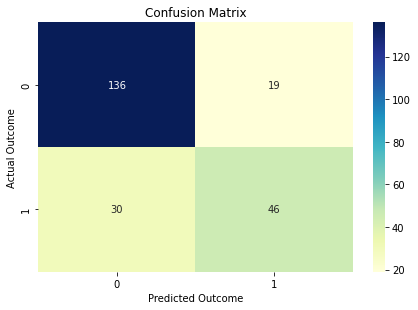

In [339]:
cnf_matrix = metrics.confusion_matrix(ytest, logregPredict)
cnf_matrix
class_names=[0,1]
fig = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual Outcome')
plt.xlabel('Predicted Outcome')

## KNN Classifier

In [340]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

### Selecting best value of K for KNN Classifier

In [341]:
kScores = {}
for k in range(1, 30):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(xtrain, ytrain)
  knnPredict = knn.predict(xtest)
  kScores[k] = metrics.f1_score(ytest, knnPredict)
maxVal = 0
maxKey = 0
for key, value in kScores.items() :
  if maxVal < value :
    maxVal = value
    maxKey = key
K = maxKey
K

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

13

In [342]:
knn=KNeighborsClassifier(n_neighbors=K)
knn.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=13)

In [343]:
knnPredict = knn.predict(xtest)
knnPredict

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [344]:
print("Accuracy:",metrics.accuracy_score(ytest, knnPredict))
print("Precision:",metrics.precision_score(ytest, knnPredict))
print("Recall:",metrics.recall_score(ytest, knnPredict))
knnF1 = metrics.f1_score(ytest, knnPredict)
print("F1 Score:", knnF1)

Accuracy: 0.7662337662337663
Precision: 0.6666666666666666
Recall: 0.5789473684210527
F1 Score: 0.619718309859155


Text(0.5, 15.0, 'Predicted Outcome')

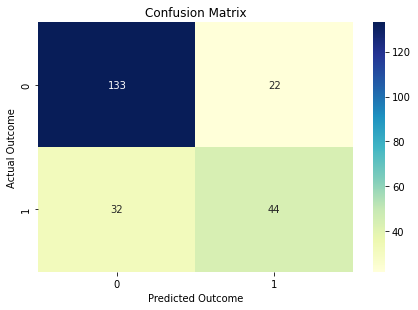

In [345]:
cnf_matrix = metrics.confusion_matrix(ytest, knnPredict)
cnf_matrix
class_names=[0,1]
fig = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual Outcome')
plt.xlabel('Predicted Outcome')

## Naive Bayes Classifier

In [346]:
from sklearn.naive_bayes import GaussianNB

In [347]:
naiveBayes = GaussianNB()
naiveBayes.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [348]:
nbPredict = naiveBayes.predict(xtest)
nbPredict

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0])

In [349]:
print("Accuracy:",metrics.accuracy_score(ytest, nbPredict))
print("Precision:",metrics.precision_score(ytest, nbPredict))
print("Recall:",metrics.recall_score(ytest, nbPredict))
nbF1 = metrics.f1_score(ytest, nbPredict)
print("F1 Score:", nbF1)

Accuracy: 0.8095238095238095
Precision: 0.7162162162162162
Recall: 0.6973684210526315
F1 Score: 0.7066666666666668


Text(0.5, 15.0, 'Predicted Outcome')

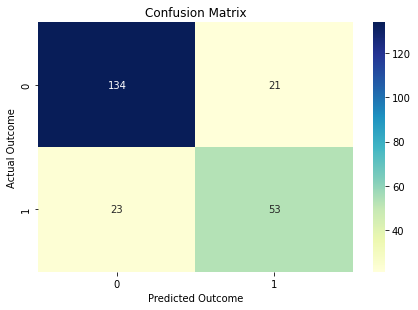

In [350]:
cnf_matrix = metrics.confusion_matrix(ytest, nbPredict)
cnf_matrix
class_names=[0,1]
fig = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual Outcome')
plt.xlabel('Predicted Outcome')

## Comparing the Three Models

In [351]:
if logregF1 >= knnF1 and logregF1 >= nbF1 :
  model = LogisticRegression()
elif knnF1 >= nbF1 :
  model = KNeighborsClassifier(n_neighbors=K)
else :
  model = GaussianNB()

## Training the Best Model with the whole Data

In [352]:
XfinalTrain = pd.read_csv('drive/MyDrive/DiabetesPrediction/XdiabetesProcessed.csv')
YfinalTrain = pd.read_csv('drive/MyDrive/DiabetesPrediction/YdiabetesProcessed.csv')

In [353]:
model.fit(XfinalTrain, YfinalTrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()